In [33]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

df = sns.load_dataset("mpg").drop("name", axis = 1)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [34]:
df["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [36]:
df.query("horsepower.isna()")
# Exercise: impute the values 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [37]:
df.dropna(axis = 0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


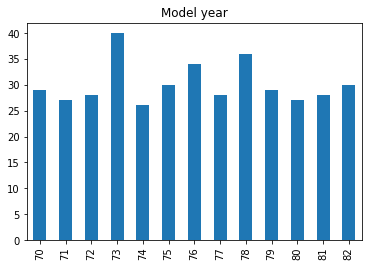

In [38]:
df["model_year"].value_counts().sort_index().plot(kind = "bar", title = "Model year");

In [39]:
bins = pd.IntervalIndex.from_tuples([(69, 73), (74,77), (78,82)])
df["model_year"] = pd.cut(df["model_year"], bins = bins)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,"(69, 73]",usa
1,15.0,8,350.0,165.0,3693,11.5,"(69, 73]",usa
2,18.0,8,318.0,150.0,3436,11.0,"(69, 73]",usa
3,16.0,8,304.0,150.0,3433,12.0,"(69, 73]",usa
4,17.0,8,302.0,140.0,3449,10.5,"(69, 73]",usa


In [40]:
df = pd.get_dummies(df, columns=["model_year", "origin"], drop_first=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,"model_year_(74, 77]","model_year_(78, 82]",origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,0,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,0,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,0,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,0,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,0,0,0,1


# Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# pick out values, i.e. numpy arrays and not DataFrame or Series
X, y = df.drop("mpg", axis = 1).values, df["mpg"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.shape, scaled_X_test.shape

((274, 9), (118, 9))

# Multiple Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

model_lin_reg = LinearRegression()
model_lin_reg.fit(scaled_X_train, y_train)

intercept, coefficients = model_lin_reg.intercept_, model_lin_reg.coef_

intercept, coefficients

(23.637591240875913,
 array([-0.07963534,  0.71698622, -1.5802261 , -4.49219087, -0.08849455,
         0.36793355,  2.76523073,  0.02957218, -1.25074873]))

# Artificial Neural Network (ANN)

In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import SGD

model_shallow = Sequential(name = "Shallow_network")
model_shallow.add(InputLayer(X_train.shape[1]))
model_shallow.add(Dense(1, name = "Output_layer")) # note no activation function --> linear activation
model_shallow.compile(loss = "mean_squared_error", optimizer=SGD(learning_rate=.01))
model_shallow.summary()

Model: "Shallow_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Output_layer (Dense)        (None, 1)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [44]:
model_shallow.fit(scaled_X_train, y_train, epochs=50,
                  verbose=1, validation_data=(scaled_X_test, y_test))

Epoch 1/50
9/9 [==============================] - 1s 37ms/step - loss: 531.3799 - val_loss: 380.9378
Epoch 2/50
9/9 [==============================] - 0s 10ms/step - loss: 355.7418 - val_loss: 257.3349
Epoch 3/50
9/9 [==============================] - 0s 10ms/step - loss: 248.4326 - val_loss: 177.0434
Epoch 4/50
9/9 [==============================] - 0s 13ms/step - loss: 175.8523 - val_loss: 122.8977
Epoch 5/50
9/9 [==============================] - 0s 8ms/step - loss: 125.3686 - val_loss: 86.1641
Epoch 6/50
9/9 [==============================] - 0s 10ms/step - loss: 91.1677 - val_loss: 61.0138
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 67.0274 - val_loss: 43.6147
Epoch 8/50
9/9 [==============================] - 0s 6ms/step - loss: 50.0725 - val_loss: 31.9515
Epoch 9/50
9/9 [==============================] - 0s 6ms/step - loss: 38.4361 - val_loss: 24.3251
Epoch 10/50
9/9 [==============================] - 0s 9ms/step - loss: 30.2400 - val_loss: 19.1140
Epoch

In [45]:
df_loss = pd.DataFrame(model_shallow.history.history)
df_loss.head()

,loss,val_loss
0,531.379944,380.937775
1,355.741821,257.334869
2,248.432602,177.043411
3,175.852325,122.897690
4,125.368645,86.164085


In [46]:
df_loss.index = range(1, len(df_loss)+1)
df_loss.head()

,loss,val_loss
1,531.379944,380.937775
2,355.741821,257.334869
3,248.432602,177.043411
4,175.852325,122.897690
5,125.368645,86.164085


<AxesSubplot:xlabel='Epochs', ylabel='MSE loss'>

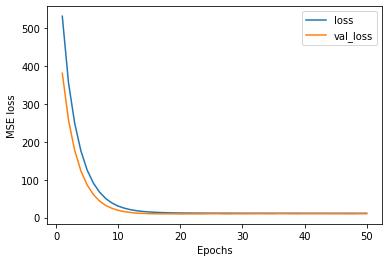

In [47]:
df_loss.plot(xlabel = "Epochs", ylabel = "MSE loss")

In [50]:
weights, bias = model_shallow.layers[0].get_weights()

print(f"Linear reg: {intercept=}, {coefficients=}")
print(f"ANN {bias=}, {weights=}")

Linear reg: intercept=23.637591240875913, coefficients=array([-0.07963534,  0.71698622, -1.5802261 , -4.49219087, -0.08849455,
        0.36793355,  2.76523073,  0.02957218, -1.25074873])
ANN bias=array([23.627485], dtype=float32), weights=array([[-0.18430397],
       [-0.5759053 ],
       [-1.8467497 ],
       [-3.1089401 ],
       [-0.3852231 ],
       [ 0.25703147],
       [ 2.6565936 ],
       [ 0.22339715],
       [-0.99692106]], dtype=float32)


# Prediction and evaluation

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_ANN = model_shallow.predict(scaled_X_test)
y_pred_lin_reg = model_lin_reg.predict(scaled_X_test)

print("MAE, RMSE for ANN:")
print(mean_absolute_error(y_test, y_pred_ANN), np.sqrt(mean_squared_error(y_test, y_pred_ANN)))

print("MAE, RMSE for linear regression:")
print(mean_absolute_error(y_test, y_pred_lin_reg), np.sqrt(mean_squared_error(y_test, y_pred_lin_reg)))

MAE, RMSE for ANN:
2.5420293436212047 3.1854558085170286
MAE, RMSE for linear regression:
2.522333542823752 3.1212202349360942
